In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
%config InlineBackend.figure_format = 'retina'

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from Toy_model import *
import sys 
sys.path.append("../utils") 
from Evaluation_plot import *

In [30]:
toymodel = Toymodel()

(1001, 19)


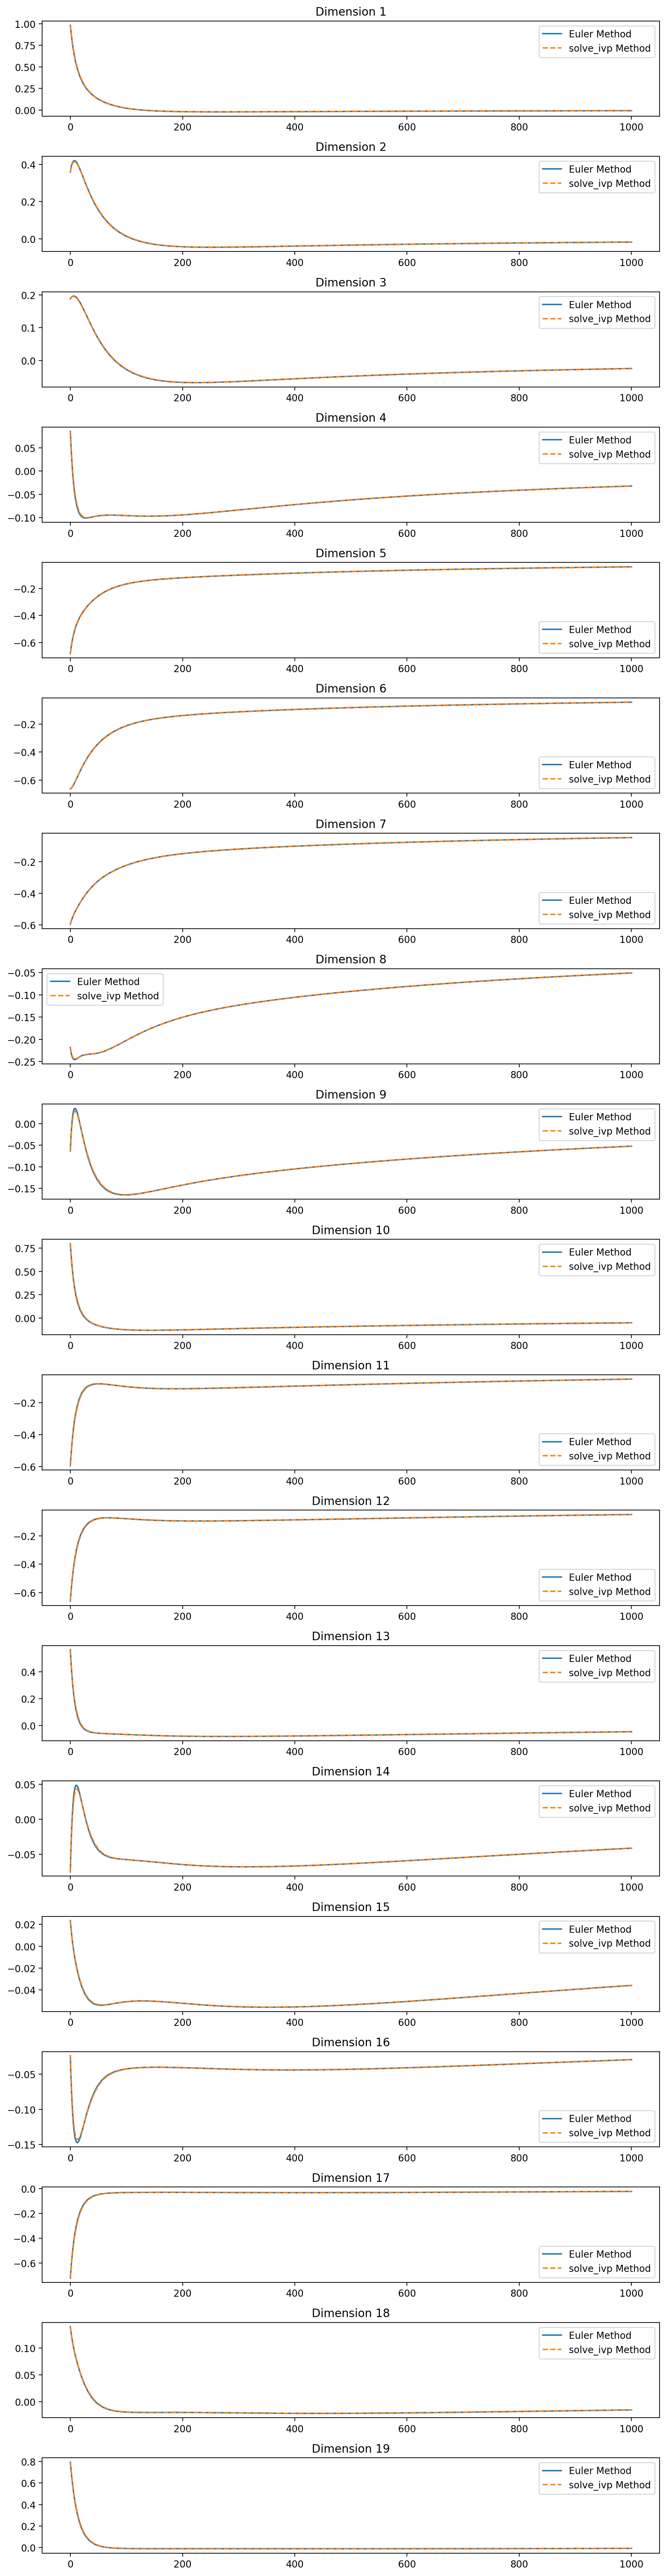

In [49]:
dlt_t = 0.0001
steps = 1000
u0 = 2 * np.random.rand(toymodel.dim - 1) - 1  # 初始条件
traj_euler = toymodel.generate_traj(steps, u0, dlt_t = dlt_t)
traj_ivp = toymodel.generate_traj_solve_ivp(steps, u0, dlt_t = dlt_t)

# 绘制每个维度的图像对比
fig, axs = plt.subplots(toymodel.dim - 1, 1, figsize=(10, 2 * (toymodel.dim - 1)))
for i in range(toymodel.dim - 1):
    axs[i].plot(traj_euler[:, i], label='Euler Method')
    axs[i].plot(traj_ivp[:, i], label='solve_ivp Method', linestyle='--')
    axs[i].set_title(f'Dimension {i+1}')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [32]:
traj_euler

array([[ 9.40361274e-01,  4.06486245e-01,  5.52841901e-01, ...,
        -7.76534434e-01, -3.11098948e-02,  5.23144858e-01],
       [ 3.50557933e-01,  6.78239197e-01,  2.99993733e-01, ...,
         2.87350266e-02, -1.07546730e-01,  9.18050434e-02],
       [ 3.41099788e-01,  3.95502262e-01,  4.83147536e-01, ...,
        -1.42572806e-01,  2.68129849e-02, -2.47487144e-02],
       ...,
       [ 2.25341034e-08,  4.45133424e-08,  6.53965151e-08, ...,
         6.53965151e-08,  4.45133424e-08,  2.25341034e-08],
       [ 2.22896235e-08,  4.40304025e-08,  6.46870069e-08, ...,
         6.46870069e-08,  4.40304025e-08,  2.22896235e-08],
       [ 2.20477961e-08,  4.35527023e-08,  6.39851964e-08, ...,
         6.39851964e-08,  4.35527023e-08,  2.20477961e-08]])

In [53]:
dlt_t = 0.0001
# data_x, data_y, data_lace_x, data_lace_y = toymodel.genarate_training_data(steps = 10, traj_num = 500, dlt_t = dlt_t, type = 'Euler-forward')
data_x, data_y, data_lace_x, data_lace_y = toymodel.genarate_training_data(steps = 10, traj_num = 500, dlt_t = dlt_t, type = 'Solve_ivp')

(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(

In [54]:
dlt_t

0.0001

In [55]:
data_x.shape

(95000, 1)

In [56]:
# Dictionary setting
mu_error_bound = 1e-8
poly = DicPoly(10)

In [57]:
mu_pred, K, mu_history, err_history, koopman_history = Original_Hybrid_Method(data_x, data_y, data_lace_x, poly, mu_error_bound)

epoch = 0, the error is 0.989798
epoch = 1, the error is 0.489970
epoch = 2, the error is 0.242555
epoch = 3, the error is 0.120084
epoch = 4, the error is 0.059461
epoch = 5, the error is 0.029453
epoch = 6, the error is 0.014598
epoch = 7, the error is 0.007377
epoch = 8, the error is 0.004272
epoch = 9, the error is 0.002735
epoch = 10, the error is 0.001974
epoch = 11, the error is 0.001598
epoch = 12, the error is 0.001411
epoch = 13, the error is 0.001319
epoch = 14, the error is 0.001275
epoch = 15, the error is 0.001274
epoch = 16, the error is 0.001273
epoch = 17, the error is 0.001273
epoch = 18, the error is 0.001272
epoch = 19, the error is 0.001272
epoch = 20, the error is 0.001272
epoch = 21, the error is 0.001272
epoch = 22, the error is 0.001272
epoch = 23, the error is 0.001272
epoch = 24, the error is 0.001272
epoch = 25, the error is 0.001272
epoch = 26, the error is 0.001272


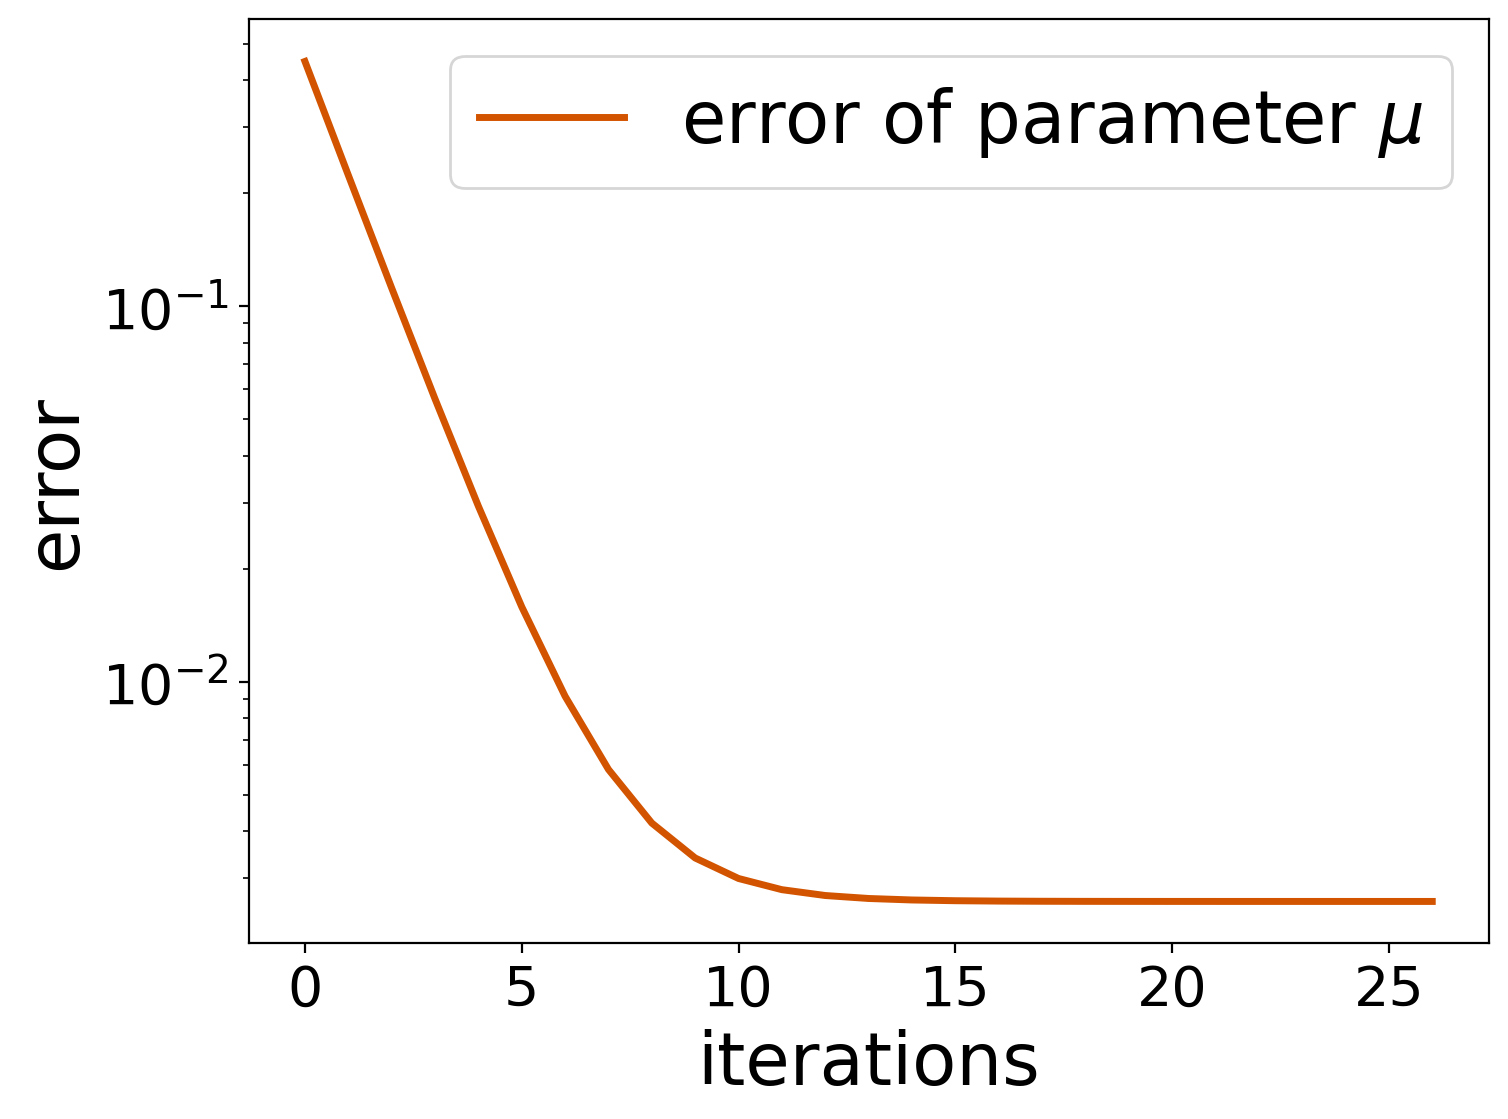

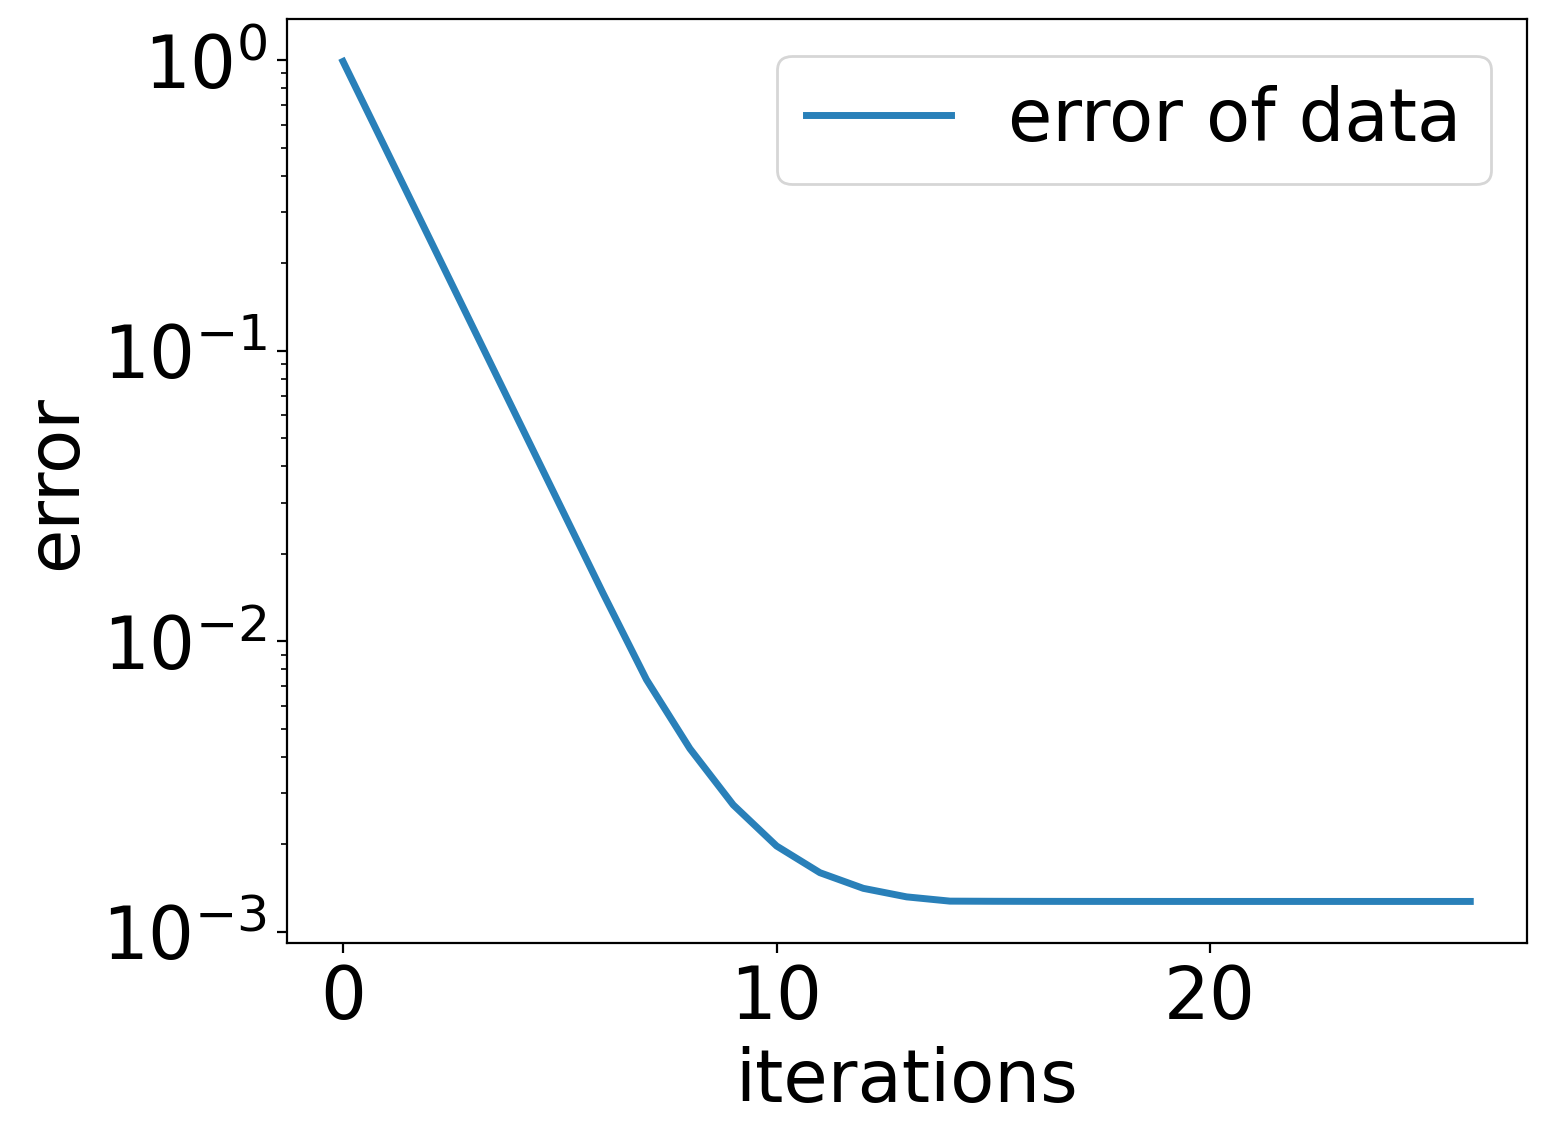

In [63]:
# Converge plot
Parameter_interate(mu_history, '$\mu$', 0.04)
error_interate(err_history)

In [64]:
predict_num = 50
steps = 1000

In [65]:
# koopman
K_koopman = Koopman_solver(data_x, data_y, poly)
# naive
mu_1 = mu_history[1]
K_1 = Koopman_solver(data_x, data_y - np.matmul(data_lace_x,mu_1), poly)

In [66]:
K_linear = np.zeros(np.shape(K_koopman))

In [79]:
u_h_history = []
u_k_history = []
u_1_history = []
u_linear_history = []
u_h_traj_history = []
u_k_traj_history = []
u_1_traj_history = []
u_linear_traj_history = []
u_test_traj_history = []
for i in range(predict_num):
    u0 = np.random.rand(toymodel.dim - 1)
    u_test = toymodel.generate_traj_solve_ivp(steps = steps, u0 = u0, dlt_t = dlt_t)
    u_hybrid = Hybrid_predictor(mu_pred, K, poly, u0, steps)
    u_koopman = Koopman_predictor(K_koopman, poly, u0, steps,state_dim=1)
    u_linear = Hybrid_predictor(mu_1, K_linear, poly, u0, steps)
    u_1 = Hybrid_predictor(mu_1, K_1, poly, u0, steps)
    u_h_history.append(np.linalg.norm(u_test - u_hybrid, ord=2, axis = 1)/np.linalg.norm(u_test, ord = 2))
    u_k_history.append(np.linalg.norm(u_test - u_koopman, ord=2, axis = 1)/np.linalg.norm(u_test, ord = 2))
    u_1_history.append(np.linalg.norm(u_test - u_1, ord=2, axis = 1)/np.linalg.norm(u_test, ord = 2))
    u_linear_history.append(np.linalg.norm(u_test - u_linear, ord=2, axis = 1)/np.linalg.norm(u_test, ord = 2))
    u_test_traj_history.append(u_test)
    u_h_traj_history.append(u_hybrid)
    u_k_traj_history.append(u_koopman)
    u_1_traj_history.append(u_1)
    u_linear_traj_history.append(u_linear)

(1001, 19)


/home/shiqi/code/Nonintrusive-model-combination-for-learning-dynamics/toy-model/Toy_model.py:106: RuntimeWarning: overflow encountered in multiply
  cur_poly_data = cur_poly_data * data[:,i]
/home/shiqi/code/Nonintrusive-model-combination-for-learning-dynamics/toy-model/Toy_model.py:402: RuntimeWarning: invalid value encountered in matmul
  u_koopman = dic.call(np.reshape(u0,(-1,1))) @ K


(1001, 19)


/home/shiqi/code/Nonintrusive-model-combination-for-learning-dynamics/toy-model/Toy_model.py:401: RuntimeWarning: invalid value encountered in matmul
  u_linear = mu * u0 @ A


(1001, 19)
(1001, 19)


/home/shiqi/anaconda3/envs/tensor-koopman/lib/python3.8/site-packages/numpy/linalg/linalg.py:2541: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)


/home/shiqi/code/Nonintrusive-model-combination-for-learning-dynamics/toy-model/Toy_model.py:402: RuntimeWarning: overflow encountered in matmul
  u_koopman = dic.call(np.reshape(u0,(-1,1))) @ K


(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)


/home/shiqi/code/Nonintrusive-model-combination-for-learning-dynamics/toy-model/Toy_model.py:403: RuntimeWarning: invalid value encountered in add
  u1 = u_linear + u_koopman[:,1]


(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)
(1001, 19)


In [80]:
err_h = np.linalg.norm(np.array(u_h_traj_history) - np.array(u_test_traj_history))/np.linalg.norm(u_test_traj_history)
err_k = np.linalg.norm(np.array(u_k_traj_history) - np.array(u_test_traj_history))/np.linalg.norm(u_test_traj_history)
err_linear = np.linalg.norm(np.array(u_linear_traj_history) - np.array(u_test_traj_history))/np.linalg.norm(u_test_traj_history)
err_1 = np.linalg.norm(np.array(u_1_traj_history) - np.array(u_test_traj_history))/np.linalg.norm(u_test_traj_history)

print(err_h)
print(err_linear)
print(err_k)
print(err_1)

0.07822019027344143
0.9978054636224227
0.7621355038275092
nan


In [81]:
print(np.shape(u_h_history))

(50, 1001)


In [82]:
def compute_stat_info(data):
    data_mean = np.mean(data, axis = 0)
    data_std = np.std(data, axis = 0)
    mean_plus_std = data_mean + data_std
    mean_minus_std = data_mean - data_std
    return data_mean, data_std, mean_plus_std, mean_minus_std

In [83]:
hybrid_mean, hybrid_std, hybrid_u, hybrid_l = compute_stat_info(u_h_history)
koopman_mean, koopman_std, koopman_u, koopman_l = compute_stat_info(u_k_history)
naive_mean, naive_std, naive_u, naive_l = compute_stat_info(u_1_history)

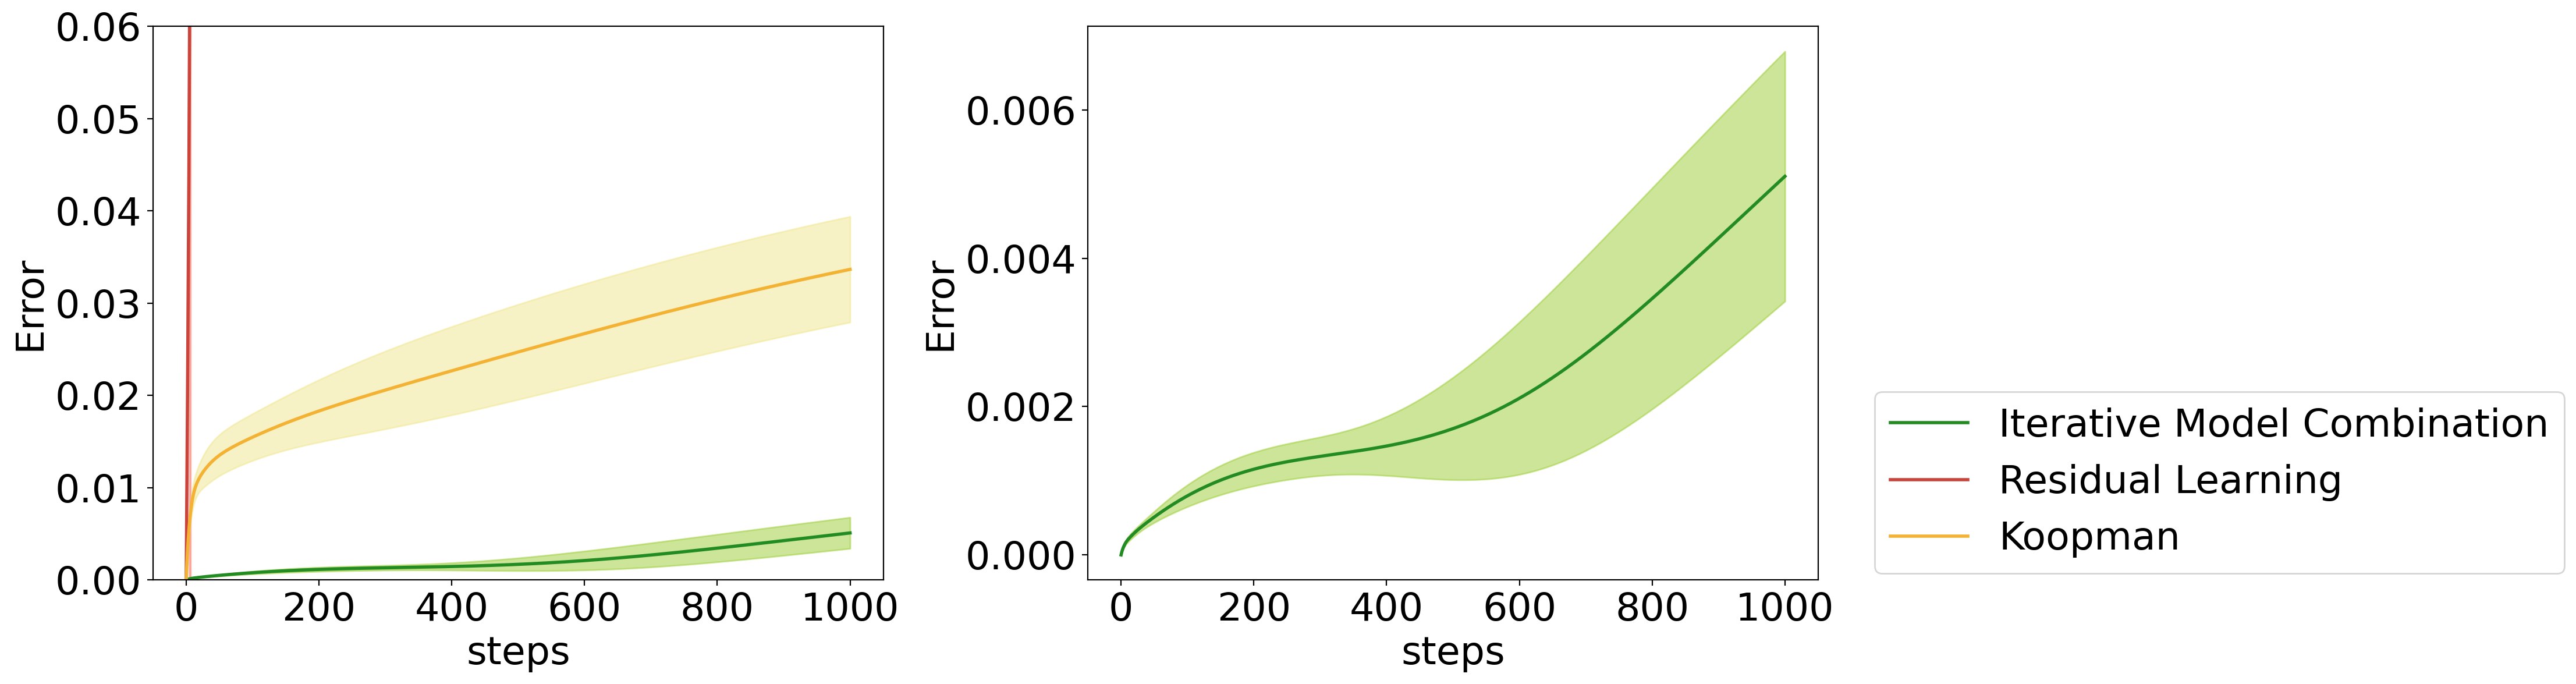

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing code for data and formatting

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=100)
font_size = 24
line_width = 2

# Plot on the left subplot
axes[0].tick_params(labelsize=font_size)
axes[0].plot(range(steps + 1), hybrid_mean, color=color_dict_compare['our'], linewidth=line_width, label='Iterative Model Combination')
axes[0].fill_between(range(steps + 1), hybrid_l, hybrid_u, color='yellowgreen', alpha=0.5)
axes[0].plot(range(steps + 1), naive_mean, color=color_dict_compare['compare3'], linewidth=line_width, label='Residual Learning')
axes[0].fill_between(range(steps + 1), naive_l, naive_u, color='salmon', alpha=0.5)
axes[0].plot(range(steps + 1), koopman_mean, color=color_dict_compare['compare1'], linewidth=line_width, label='Koopman')
axes[0].fill_between(range(steps + 1), koopman_l, koopman_u, color='khaki', alpha=0.5)
axes[0].set_ylim(0, 0.06)
axes[0].set_xlabel('steps', fontsize=font_size)
axes[0].set_ylabel('Error', fontsize=font_size)

# Plot on the right subplot
axes[1].tick_params(labelsize=font_size)
axes[1].plot(range(steps + 1), hybrid_mean, color=color_dict_compare['our'], linewidth=line_width)
axes[1].fill_between(range(steps + 1), np.maximum(hybrid_l, np.zeros(steps + 1)), hybrid_u, color='yellowgreen', alpha=0.5)
axes[1].set_xlabel('steps', fontsize=font_size)
axes[1].set_ylabel('Error', fontsize=font_size)

lines, labels = axes[0].get_legend_handles_labels()
legend = fig.legend(lines, labels, fontsize=font_size, loc='center left', bbox_to_anchor=(1, 0.3))

# Show the plot
plt.tight_layout()  # Adjust spacing
plt.show()
